In [15]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10) 
pd.options.display.max_columns = None

In [16]:
df= pd.read_pickle('datos/cars_price_norm_est_cod.pkl')
df.head(2)

,Levy,Prod_year,Mileage,Cylinders,Airbags,Price_log,Leather_interior_le,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Hybrid,Fuel_type_Hydrogen,Fuel_type_LPG,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear
0,1.766963,-0.411248,0.237134,1.375313,1.329406,9.497622,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0.943936,-0.173337,0.273438,1.375313,0.319668,9.718422,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [3]:
df.shape

(9877, 35)

##### <font color=green> En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:

##### <font color=green> Calculéis las métricas para vuestro modelo

- Primero realizaremos la creación del modelo, igual que realizamos en el pair anterior

In [17]:
X = df.drop("Price_log", axis = 1)
y = df["Price_log"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [20]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [21]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los coches que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los coches que tenemos en los datos de test

In [22]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
13506,7.619724,9.198761,Train
1284,9.404508,9.325684,Train
278,10.816934,10.130280,Train
12539,9.303466,9.417786,Train
7494,10.810738,10.118774,Train


In [23]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
13506,7.619724,9.198761,Train,-1.579037
1284,9.404508,9.325684,Train,0.078825
278,10.816934,10.130280,Train,0.686655
12539,9.303466,9.417786,Train,-0.114319
7494,10.810738,10.118774,Train,0.691963


MemoryError: Unable to allocate 2.58 TiB for an array with shape (354690988554,) and data type float64

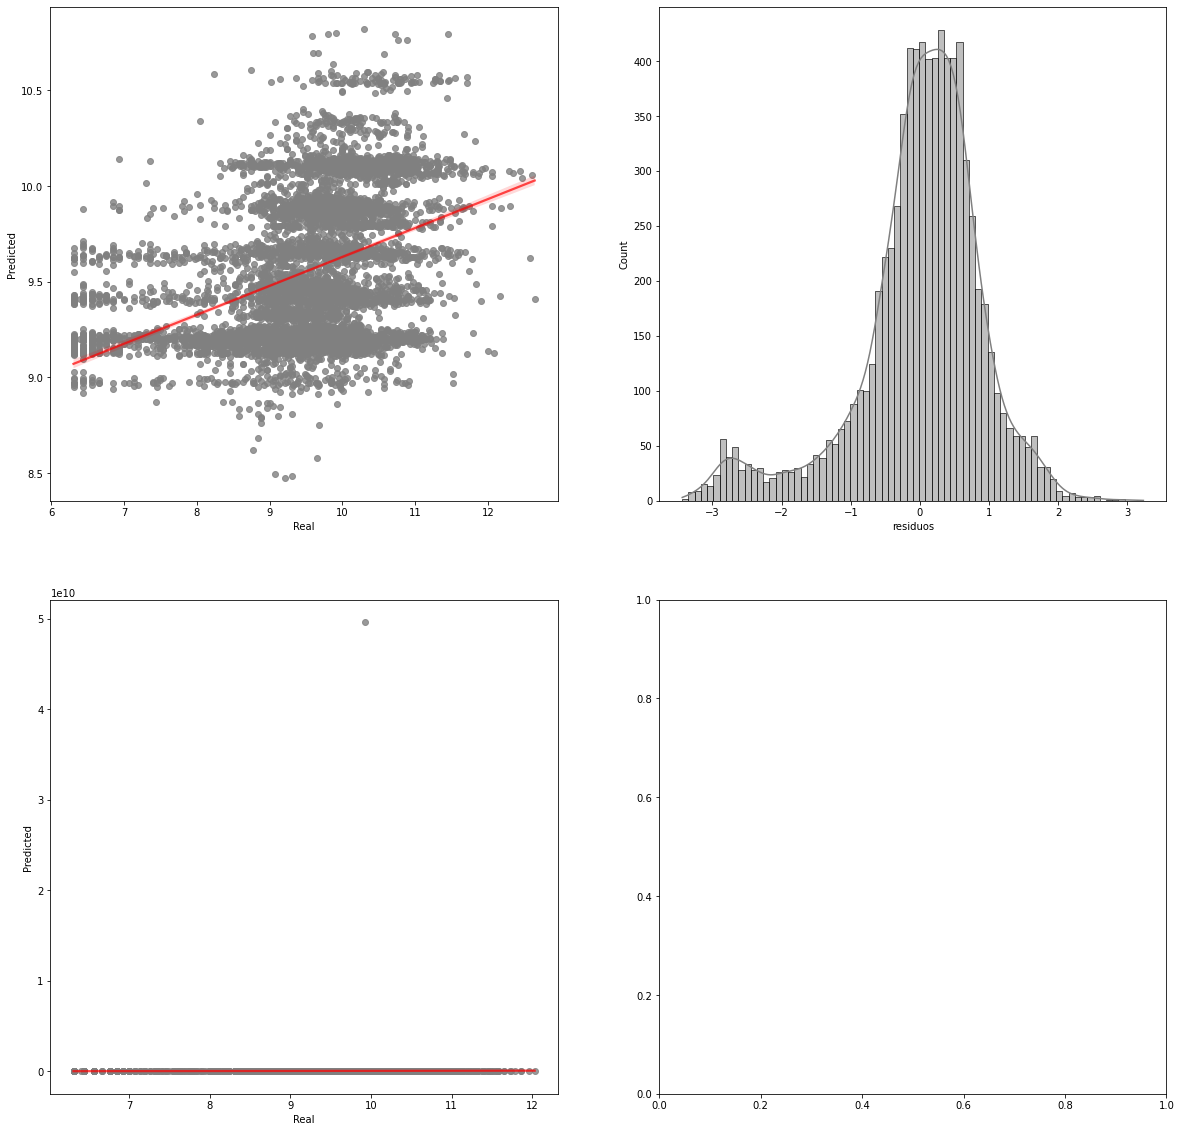

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [24]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.1512823340981556
El MAE es 0.659845201047195
El MSE es 0.8415468646615031
EL RMSE es  0.9173586347015561
Para el conjunto test:---------------
El valor de r2 score es  -1.272734116362947e+18
El MAE es 25124460.366397087
El MSE es 1.2473272290481295e+18
EL RMSE es  1116838049.606177


Lo convertimos a dataframe para analizarlo mejor:

In [26]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,2.512446e+07,1.247327e+18,1.116838e+09,-1.272734e+18,test,Linear Regresion
1,6.598452e-01,8.415469e-01,9.173586e-01,1.512823e-01,train,LinearRegression


##### <font color=green> Discutid los resultados de las métricas y extraed conclusiones

In [27]:
resultados

,Real,Predicted,Set,residuos
13506,7.619724,9.198761,Train,-1.579037
1284,9.404508,9.325684,Train,0.078825
278,10.816934,10.130280,Train,0.686655
12539,9.303466,9.417786,Train,-0.114319
7494,10.810738,10.118774,Train,0.691963
...,...,...,...,...
12837,10.484361,10.095154,Test,0.389208
6717,8.679822,9.216675,Test,-0.536853
8534,9.436998,9.194611,Test,0.242387
11366,10.258782,10.121368,Test,0.137413


In [ ]:
#OJO MODIFICAR EL ANÁLISIS

Análisis de resultados.

R²: en el train tenemos un valor de 1.528995e-01, nuestro modelo es capaz de explicar un 6% de la variación en el valor de los precios de los coches. Es decir, nuestras variables predictoras explican en un 6% de la variación de los precios de los coches. Realmente es un valor muy bajo, habría que incluir otras variables predictoras a nuestro modelo, pero cuáles?
MAE, el MSE y RMSE: nuestros valores estan muy cerca del 1, lo que nos indica que nuestro modelo comete muchos errores en las predicciones, nuestro modelo no es bueno!!

Interpretamos en el texto siguiente que nuestros precios se equivocan un 96% del precio?? Aquí merece una especial mención el RMSE, que si bien el resto de las métricas suelen ser ambiguas esta métrica si la podemos "traducir a humano". En nuestro caso tenemos un valor de RMSE en el train. ¿Qué significa esto? Significa que de media nuestro modelo se equivoca en 0.96 (dolares, euros, ...) en las predicciones. Pero recordad importante!!!! Habíamos escalados los datos y nuestros valores de los precios de las casas varían entre 0 - 1.

<font color=violet>Guardamos este df para usarlo en próximas lecciones.

In [28]:
df_resultados.to_pickle('datos/cars_price_LR.pkl')

In [29]:
df_resultados.to_csv('datos/cars_price_LR.csv')